### Computational Task no.3
You will be implementing Yule process, where the number of births is proportional to the size of the population, and a non-homogeneous perturbation of the process modeling, e.g. seasonal variability in the birth rate:
1. Implement the Yule process with fixed rate  $ν = 0.4n$, where n is the size of the population.
2. Implement the Yule process with rate $ν(t) = 0.4n + 2 sin(t)$.
Simulate the population on the time interval [0, 100]. In all cases show the distribution of population sizes at t = 10, 50 and 100. Start with n(0) = 1.

Implement τ -leaping by doing the following: Discretize the time into intervals of length τ > 0, and assume that the birth rate in each interval is constant and determined by the population size at the beginning of the interval. Thus if the population at some time t = jτ equals n(t), then the number of births in the interval [jτ,(j + 1)τ) is approximated by a Poisson distribution with parameter τν(t). Note that ν(t) depends on population size at time t.

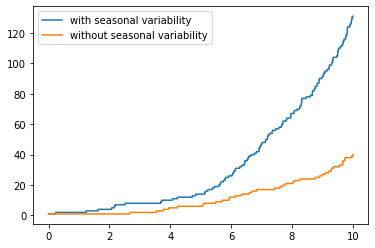

In [19]:
import numpy as np
import matplotlib.pyplot as plt 
from numba import jit


@jit(nopython=True)
def Sim_func(maxtime,tau, seasonal,size, i_size):
    ns = 0
    t  = 0
    x    = np.zeros(size)
    time = np.zeros(size)
    x[0] = i_size
    while t <= maxtime:
        if seasonal:
            v = 0.4*x[ns]+(2*np.sin(t))
            if v <0:
                v=0
        else:  
            v = 0.4*x[ns]
        r= np.random.poisson(lam = tau*v)
        x[ns+1] = x[ns] + r
        time[ns+1] = tau +time[ns]
        t = tau+t
        ns = ns+1
        if ns == size-1:
            break
        
    return time[0:ns], x[0:ns]


time, x   = Sim_func(maxtime = 100, tau = 0.0001,seasonal= True,size=100000,i_size=1  )
time2, x2 = Sim_func(maxtime = 100, tau = 0.0001,seasonal= False,size=100000,i_size=1  )
plt.plot(time,x)
plt.plot(time2,x2)
plt.legend(['with seasonal variability', 'without seasonal variability'])


In [20]:
y1 = np.zeros(1000)
y2 = np.zeros(1000)
y3 = np.zeros(1000)


for j in range(1000):
    times,x = Sim_func(maxtime = 100, tau = 0.0001,seasonal= False,size=100000000,i_size=1)
    y1[j]  = x[100000-1]
    y2[j]  = x[500000-1]
    y3[j]  = x[1000000-1]
 

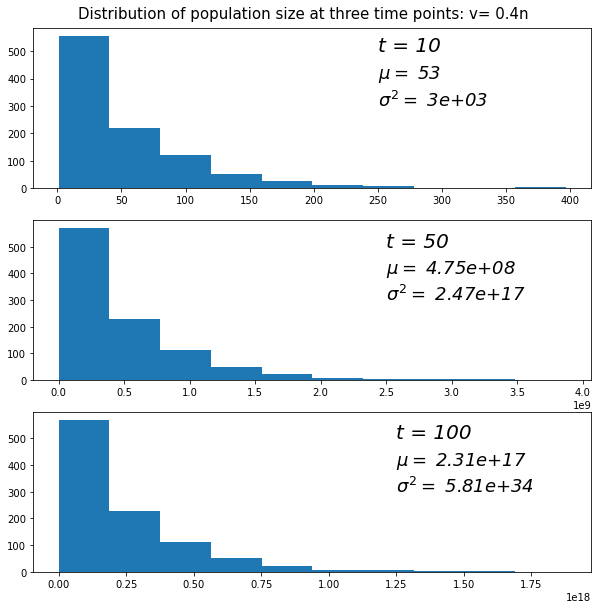

In [169]:
fig, axs = plt.subplots(3)
fig.set_size_inches(10, 10)
fig.suptitle('Distribution of population size at three time points: v= 0.4n',x = .5,y=0.9, size  = 15,va ='center' , ha = 'center')
axs[0].text(250, 500, "t = 10", style = 'italic',size =20)
axs[0].text(250, 400, "$\mu = $ 53", style = 'italic',size =18)
axs[0].text(250, 300, "$\sigma^2 = $ 3e+03", style = 'italic',size =18)
axs[1].text(2.5*10**9, 500, "t = 50", style = 'italic',size =20)
axs[1].text(2.5*10**9, 400, "$\mu = $ 4.75e+08", style = 'italic',size =18)
axs[1].text(2.5*10**9, 300, "$\sigma^2 = $ 2.47e+17", style = 'italic',size =18)
axs[2].text(1.25*10**18, 500, "t = 100", style = 'italic',size =20)
axs[2].text(1.25*10**18, 400, "$\mu = $ 2.31e+17", style = 'italic',size =18)
axs[2].text(1.25*10**18, 300, "$\sigma^2 = $ 5.81e+34", style = 'italic',size =18)
axs[0].hist(y1)
axs[1].hist(y2)
axs[2].hist(y3);

In [15]:

z1 = np.zeros(1000)
z2 = np.zeros(1000)
z3 = np.zeros(1000)


for j in range(1000):
    times,x = Sim_func(maxtime = 100, tau = 0.0001,seasonal= True,size=100000000,i_size=1)
    z1[j]  = x[100000-1]
    z2[j]  = x[500000-1]
    z3[j]  = x[1000000-1]
 

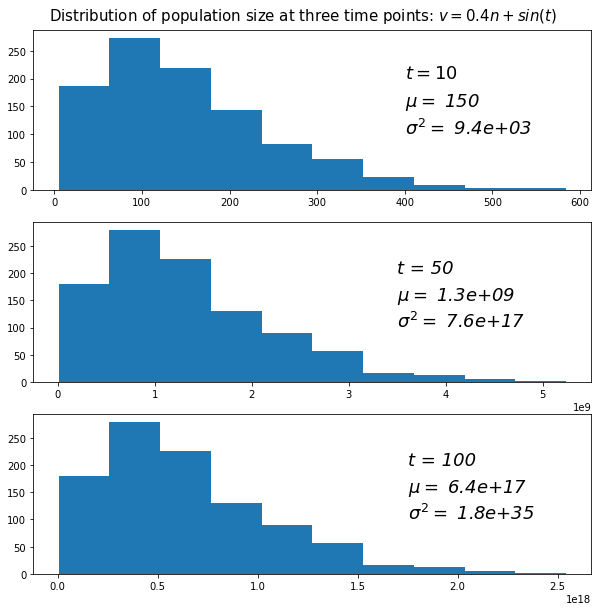

In [148]:
fig, axs = plt.subplots(3)
fig.set_size_inches(10, 10)
meanz1 = sum(z1)/len(z1)

fig.suptitle('Distribution of population size at three time points: $v= 0.4n + sin(t)$',x = .5,y=0.9, size  = 15,va ='center' , ha = 'center')
axs[0].text(400, 200, "$t = 10$", style = 'italic',size =18)
axs[0].text(400, 150, "$\mu = $ 150", style = 'italic',size =18)
axs[0].text(400, 100, "$\sigma^2 = $ 9.4e+03", style = 'italic',size =18)
axs[1].text(3.5*10**9, 200, "t = 50", style = 'italic',size =18)
axs[1].text(3.5*10**9, 150, "$\mu = $ 1.3e+09", style = 'italic',size =18)
axs[1].text(3.5*10**9, 100, "$\sigma^2 = $ 7.6e+17", style = 'italic',size =18)
axs[2].text(1.75*10**18, 200, "t = 100", style = 'italic',size =18)
axs[2].text(1.75*10**18, 150, "$\mu = $ 6.4e+17", style = 'italic',size =18)
axs[2].text(1.75*10**18, 100, "$\sigma^2 = $ 1.8e+35", style = 'italic',size =18)
axs[0].hist(z1)
axs[1].hist(z2)
axs[2].hist(z3);